In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('drive/My Drive/Colab Notebooks/LabVanced/RecordingPilot/cross_expr')

In [ ]:
labvanced = pd.read_csv('cross_02_LV.csv')
eyelink = pd.read_csv('cross_02_EL.csv')

In [ ]:
labvanced.head(5)

,Block_Name,Block_Nr,exp_subject_id,rec_session_id,session_nr,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,values,Y,TS
0,block_1,1,142209,153134,1,task_1,1,1608036523264,4,1,GazeXY_Frame04,NaN,NaN,NaN
1,block_1,1,142209,153134,1,task_1,1,1608036785919,4,1,GazeXY_Frame04,NaN,NaN,NaN
2,block_1,1,142209,153134,1,task_1,1,1608036829281,4,1,GazeXY_Frame04,2039.046249,502.311128,1.608037e+12
3,block_1,1,142209,153134,1,task_1,1,1608036829375,4,1,GazeXY_Frame04,1967.812614,494.429038,1.608037e+12
4,block_1,1,142209,153134,1,task_1,1,1608036829436,4,1,GazeXY_Frame04,1967.615776,521.431113,1.608037e+12


In [ ]:
eyelink.Time = eyelink.Time.apply(lambda x: int('%.0f' % x))
labvanced = labvanced.drop(['Block_Name', 'Block_Nr', 'exp_subject_id',
                            'rec_session_id', 'session_nr'], axis = 1)
labvanced = labvanced.rename(columns={'values': 'X'})
labvanced.dropna(inplace=True)
labvanced.TS = labvanced.TS.apply(lambda x: int('%.0f' % x))
labvanced.sort_values('TS', inplace=True)
labvanced

,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,X,Y,TS
731,task_1,1,1608036793382,4,1,GazeXY_Frame01,723.802285,919.734492,1608036793269
732,task_1,1,1608036793451,4,1,GazeXY_Frame01,1692.056980,122.971934,1608036793385
733,task_1,1,1608036793513,4,1,GazeXY_Frame01,1891.233673,188.512580,1608036793452
734,task_1,1,1608036793581,4,1,GazeXY_Frame01,1896.860504,144.488615,1608036793519
735,task_1,1,1608036793653,4,1,GazeXY_Frame01,1778.774357,270.432039,1608036793586
...,...,...,...,...,...,...,...,...,...
4077,task_1,1,1608037121864,3,5,GazeXY_Frame05,750.783720,815.354258,1608037121806
4078,task_1,1,1608037121938,3,5,GazeXY_Frame05,844.850872,820.014253,1608037121872
4079,task_1,1,1608037122009,3,5,GazeXY_Frame05,725.317297,826.215305,1608037121939
4080,task_1,1,1608037122080,3,5,GazeXY_Frame05,972.340572,806.782025,1608037122022


In [ ]:
set(labvanced.variable_name.to_list())

{'GazeXY_Frame01',
 'GazeXY_Frame02',
 'GazeXY_Frame03',
 'GazeXY_Frame04',
 'GazeXY_Frame05'}

In [ ]:
labvanced['variable_name'].replace({'GazeXY_Frame01': 'frame01_Center',
                                    'GazeXY_Frame02': 'frame02_TopLeft',
                                    'GazeXY_Frame03': 'frame03_TopRight',
                                    'GazeXY_Frame04': 'frame04_BottomRight',
                                    'GazeXY_Frame05': 'frame05_BottomLeft'}, inplace=True)
labvanced

,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,X,Y,TS
731,task_1,1,1608036793382,4,1,frame01_Center,723.802285,919.734492,1608036793269
732,task_1,1,1608036793451,4,1,frame01_Center,1692.056980,122.971934,1608036793385
733,task_1,1,1608036793513,4,1,frame01_Center,1891.233673,188.512580,1608036793452
734,task_1,1,1608036793581,4,1,frame01_Center,1896.860504,144.488615,1608036793519
735,task_1,1,1608036793653,4,1,frame01_Center,1778.774357,270.432039,1608036793586
...,...,...,...,...,...,...,...,...,...
4077,task_1,1,1608037121864,3,5,frame05_BottomLeft,750.783720,815.354258,1608037121806
4078,task_1,1,1608037121938,3,5,frame05_BottomLeft,844.850872,820.014253,1608037121872
4079,task_1,1,1608037122009,3,5,frame05_BottomLeft,725.317297,826.215305,1608037121939
4080,task_1,1,1608037122080,3,5,frame05_BottomLeft,972.340572,806.782025,1608037122022


In [ ]:
temp = labvanced.copy()
temp.head()

,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,X,Y,TS
731,task_1,1,1608036793382,4,1,frame01_Center,723.802285,919.734492,1608036793269
732,task_1,1,1608036793451,4,1,frame01_Center,1692.056980,122.971934,1608036793385
733,task_1,1,1608036793513,4,1,frame01_Center,1891.233673,188.512580,1608036793452
734,task_1,1,1608036793581,4,1,frame01_Center,1896.860504,144.488615,1608036793519
735,task_1,1,1608036793653,4,1,frame01_Center,1778.774357,270.432039,1608036793586


In [ ]:
temp['variable_name'].replace({'frame01_Center' : 'CE',
                               'frame02_TopLeft' : 'TL',
                               'frame03_TopRight' : 'TR',
                               'frame04_BottomRight' : 'BR',
                               'frame05_BottomLeft' : 'BL'}, inplace=True)
temp

,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,X,Y,TS
731,task_1,1,1608036793382,4,1,CE,723.802285,919.734492,1608036793269
732,task_1,1,1608036793451,4,1,CE,1692.056980,122.971934,1608036793385
733,task_1,1,1608036793513,4,1,CE,1891.233673,188.512580,1608036793452
734,task_1,1,1608036793581,4,1,CE,1896.860504,144.488615,1608036793519
735,task_1,1,1608036793653,4,1,CE,1778.774357,270.432039,1608036793586
...,...,...,...,...,...,...,...,...,...
4077,task_1,1,1608037121864,3,5,BL,750.783720,815.354258,1608037121806
4078,task_1,1,1608037121938,3,5,BL,844.850872,820.014253,1608037121872
4079,task_1,1,1608037122009,3,5,BL,725.317297,826.215305,1608037121939
4080,task_1,1,1608037122080,3,5,BL,972.340572,806.782025,1608037122022


In [ ]:
temp['Trial_Nr'] = temp['Trial_Nr'].astype(str)
temp

,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,X,Y,TS
731,task_1,1,1608036793382,4,1,CE,723.802285,919.734492,1608036793269
732,task_1,1,1608036793451,4,1,CE,1692.056980,122.971934,1608036793385
733,task_1,1,1608036793513,4,1,CE,1891.233673,188.512580,1608036793452
734,task_1,1,1608036793581,4,1,CE,1896.860504,144.488615,1608036793519
735,task_1,1,1608036793653,4,1,CE,1778.774357,270.432039,1608036793586
...,...,...,...,...,...,...,...,...,...
4077,task_1,1,1608037121864,3,5,BL,750.783720,815.354258,1608037121806
4078,task_1,1,1608037121938,3,5,BL,844.850872,820.014253,1608037121872
4079,task_1,1,1608037122009,3,5,BL,725.317297,826.215305,1608037121939
4080,task_1,1,1608037122080,3,5,BL,972.340572,806.782025,1608037122022


In [ ]:
temp['Task_ID'] = ''

for index, row in temp.iterrows():
    temp.loc[index, 'Task_ID'] = row['variable_name'] + '_' + row['Trial_Nr']
    
temp

,Task_Name,Task_Nr,times,Trial_Id,Trial_Nr,variable_name,X,Y,TS,Task_ID
731,task_1,1,1608036793382,4,1,CE,723.802285,919.734492,1608036793269,CE_1
732,task_1,1,1608036793451,4,1,CE,1692.056980,122.971934,1608036793385,CE_1
733,task_1,1,1608036793513,4,1,CE,1891.233673,188.512580,1608036793452,CE_1
734,task_1,1,1608036793581,4,1,CE,1896.860504,144.488615,1608036793519,CE_1
735,task_1,1,1608036793653,4,1,CE,1778.774357,270.432039,1608036793586,CE_1
...,...,...,...,...,...,...,...,...,...,...
4077,task_1,1,1608037121864,3,5,BL,750.783720,815.354258,1608037121806,BL_5
4078,task_1,1,1608037121938,3,5,BL,844.850872,820.014253,1608037121872,BL_5
4079,task_1,1,1608037122009,3,5,BL,725.317297,826.215305,1608037121939,BL_5
4080,task_1,1,1608037122080,3,5,BL,972.340572,806.782025,1608037122022,BL_5


In [ ]:
task_list = list(set(temp['Task_ID'].to_list()))
task_list

['BR_1',
 'BL_2',
 'BL_1',
 'TL_5',
 'BL_3',
 'TR_3',
 'CE_2',
 'BL_5',
 'BR_2',
 'TR_5',
 'TL_1',
 'TL_4',
 'CE_1',
 'TL_3',
 'TL_2',
 'BL_4',
 'TR_2',
 'CE_5',
 'BR_4',
 'BR_3',
 'CE_3',
 'BR_5',
 'CE_4',
 'TR_4',
 'TR_1']

In [ ]:
for task in task_list:
    df = temp[temp.Task_ID == task]
    name = 'lv_' + task
    exec('df.to_csv(\'' + name + '.csv\', index = False)')
    

In [ ]:
eyelink

,X,Y,Time
0,965.9,540.9,1608036040078
1,965.4,541.3,1608036040082
2,965.3,541.9,1608036040086
3,964.7,542.6,1608036040090
4,963.8,542.9,1608036040094
...,...,...,...
169844,0.0,0.0,1608036719454
169845,0.0,0.0,1608036719458
169846,0.0,0.0,1608036719462
169847,0.0,0.0,1608036719466


In [ ]:
# for one-hour adjustment
# eyelink.Time = eyelink.Time.apply(lambda x: x + 3600000)

In [ ]:
for task in task_list:
    df_lv = temp[temp.Task_ID == task]
    timestamp = df_lv.times.to_list()
    end_time = max(timestamp)
    start_time = min(timestamp)
    df_el = eyelink[(eyelink.Time <= end_time) & (eyelink.Time >= start_time)]
    name = 'el_' + task
    exec('df_el.to_csv(\'' + name + '.csv\', index = False)')


##**Hey Tobiasz, check this out!**

In [ ]:
start = min(temp.TS.to_list())
end = max(temp.TS.to_list())
length = round((end - start) / 60000)
print('LabVanced started recording time (in the last column) at', start)
print('and ended recording at', end)
print('The corresponding duration is roughly', length, 'min.')

print('\n\n')

start = min(temp.times.to_list())
end = max(temp.times.to_list())
length = round((end - start) / 60000)
print('LabVanced started recording time (in the "times" column) at', start)
print('and ended recording at', end)
print('The corresponding duration is roughly', length, 'min.')

print('\n\n')

start = min(eyelink.Time.to_list())
end = max(eyelink.Time.to_list())
length = round((end - start) / 60000)
print('Eyelink started recording time at', start)
print('and ended recording at', end)
print('The corresponding duration is roughly', length, 'min.')

LabVanced started recording time (in the last column) at 1608036793269
and ended recording at 1608037122089
The corresponding duration is roughly 5 min.



LabVanced started recording time (in the "times" column) at 1608036793382
and ended recording at 1608037122159
The corresponding duration is roughly 5 min.



Eyelink started recording time at 1608036040078
and ended recording at 1608036719470
The corresponding duration is roughly 11 min.


In [ ]:
dif = round((1608036793269 - 1608036040078) / 60000)
print('The difference between the smallest timestamp in Eyelink and LabVanced (last column) is about', dif, 'minutes.')

dif = round((1608036793382 - 1608036040078) / 60000)
print('The difference between the smallest timestamp in Eyelink and LabVanced (times column) is about', dif, 'minutes.')

The difference between the smallest timestamp in Eyelink and LabVanced (last column) is about 13 minutes.
The difference between the smallest timestamp in Eyelink and LabVanced (times column) is about 13 minutes.


##**LabVanced Time Difference Plot**

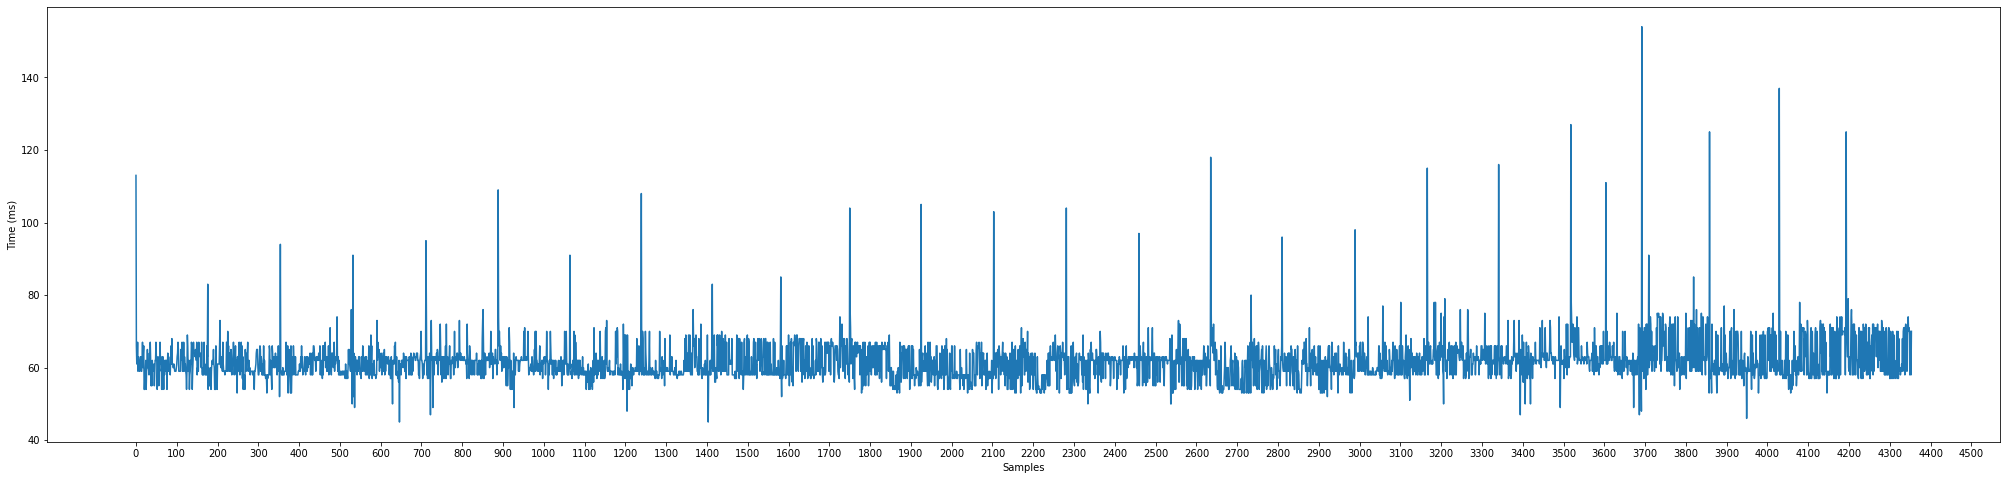

In [ ]:
last_col = labvanced.TS.to_list()
times_col = labvanced.times.to_list()
time_diff = [times_col[i] - last_col[i] for i in range(len(last_col))]
plt.figure(figsize=(35,8))
plt.xlabel('Samples')
plt.ylabel('Time (ms)')
plt.xticks(ticks=range(0,5000,100))
plt.plot(time_diff);